In [1]:
import sys
!{sys.executable} -m pip install emoji

# Lecture on Word Embedding

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
import emoji
import numpy as np

from utils2 import get_dict

nltk.download('punkt')  # download pre-trained Punkt tokenizer for English

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data preparation 

In [3]:
# replace commas and exclamation marks with periods

In [5]:
corpus = 'Who ❤️ "word embeddings" in 2020? I do!!!'

print(f'Corpus:  {corpus}')
data = re.sub(r'[,!?;-]+', '.', corpus)
print(f'After cleaning punctuation:  {data}')

Corpus:  Who ❤️ "word embeddings" in 2020? I do!!!
After cleaning punctuation:  Who ❤️ "word embeddings" in 2020. I do.


In [6]:
# split the coepus into tokens

In [7]:
print(f'Initial string:  {data}')
data = nltk.word_tokenize(data)
print(f'After tokenization:  {data}')

Initial string:  Who ❤️ "word embeddings" in 2020. I do.
After tokenization:  ['Who', '❤️', '``', 'word', 'embeddings', "''", 'in', '2020', '.', 'I', 'do', '.']


In [8]:
print(f'Initial list of tokens:  {data}')
data = [ ch.lower() for ch in data
         if ch.isalpha()
         or ch == '.'
         or emoji.get_emoji_regexp().search(ch)
       ]
print(f'After cleaning:  {data}')

Initial list of tokens:  ['Who', '❤️', '``', 'word', 'embeddings', "''", 'in', '2020', '.', 'I', 'do', '.']
After cleaning:  ['who', '❤️', 'word', 'embeddings', 'in', '.', 'i', 'do', '.']


### tokenize

In [9]:
def tokenize(corpus):
    data = re.sub(r'[,!?;-]+', '.', corpus)
    data = nltk.word_tokenize(data)  # tokenize string to words
    data = [ ch.lower() for ch in data
             if ch.isalpha()
             or ch == '.'
             or emoji.get_emoji_regexp().search(ch)
           ]
    return data

In [11]:
corpus = 'Today is great! Isn\'t it:>'
print(f'Corpus:  {corpus}')
words = tokenize(corpus)
print(f'Words (tokens):  {words}')

Corpus:  Today is great! Isn't it:>
Words (tokens):  ['today', 'is', 'great', '.', 'is', 'it']


### sliding window of words

In [12]:
def get_windows(words, C):
    i = C
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i - C):i] + words[(i+1):(i+C+1)]
        yield context_words, center_word
        i += 1

In [13]:
for x, y in get_windows(
            ['i', 'am', 'happy', 'because', 'i', 'am', 'learning'],
            2
        ):
    print(f'{x}\t{y}')

['i', 'am', 'because', 'i']	happy
['am', 'happy', 'i', 'am']	because
['happy', 'because', 'am', 'learning']	i


### transforming words into vectors for the training set

In [14]:
### mapping between indices and word


In [16]:

word2Ind, Ind2word = get_dict(words)

In [17]:
word2Ind

{'.': 0, 'great': 1, 'is': 2, 'it': 3, 'today': 4}

In [22]:
print("Index of the word 'i':  ",word2Ind['it'])

Index of the word 'i':   3


In [23]:
Ind2word
print("Word which has index 2:  ",Ind2word[2] )

Word which has index 2:   is


In [24]:
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  5


### getting one-hot word vectors

In [26]:
n = word2Ind['great']
n

1

In [27]:
center_word_vector = np.zeros(V)
center_word_vector

array([0., 0., 0., 0., 0.])

In [28]:

len(center_word_vector) == V

True

In [29]:
center_word_vector[n] = 1

In [30]:
center_word_vector

array([0., 1., 0., 0., 0.])

In [31]:
def word_to_one_hot_vector(word, word2Ind, V):
    # BEGIN your code here
    one_hot_vector = np.zeros(V)
    one_hot_vector[word2Ind[word]] = 1
    # END your code here
    return one_hot_vector

In [32]:
word_to_one_hot_vector('is', word2Ind, V)

array([0., 0., 1., 0., 0.])

### getting context word vectors

In [35]:
context_words = ['is', 'it', 'today', 'great']

In [36]:
context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
context_words_vectors

[array([0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1.]),
 array([0., 1., 0., 0., 0.])]

In [37]:
np.mean(context_words_vectors, axis=0)

array([0.  , 0.25, 0.25, 0.25, 0.25])

In [38]:
def context_words_to_vector(context_words, word2Ind, V):
    # BEGIN your code here
    context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
    context_words_vectors = np.mean(context_words_vectors, axis=0)
    # END your code here
    return context_words_vectors

In [39]:
context_words_to_vector(['is', 'it', 'today', 'great'], word2Ind, V)

array([0.  , 0.25, 0.25, 0.25, 0.25])

In [41]:
# BEGIN your code here
context_words_to_vector(['is', 'it', 'today', 'great'], word2Ind, V)
# END your code here

array([0.  , 0.25, 0.25, 0.25, 0.25])

### Building the training set

In [42]:
words

['today', 'is', 'great', '.', 'is', 'it']

In [43]:
for context_words, center_word in get_windows(words, 2):  # reminder: 2 is the context half-size
    print(f'Context words:  {context_words} -> {context_words_to_vector(context_words, word2Ind, V)}')
    print(f'Center word:  {center_word} -> {word_to_one_hot_vector(center_word, word2Ind, V)}')
    print()

Context words:  ['today', 'is', '.', 'is'] -> [0.25 0.   0.5  0.   0.25]
Center word:  great -> [0. 1. 0. 0. 0.]

Context words:  ['is', 'great', 'is', 'it'] -> [0.   0.25 0.5  0.25 0.  ]
Center word:  . -> [1. 0. 0. 0. 0.]



### The continuous bags-of-words models

### Activation functions

### ReLu

In [44]:
np.random.seed(10)
z_1 = 10*np.random.rand(5, 1)-5
z_1

array([[ 2.71320643],
       [-4.79248051],
       [ 1.33648235],
       [ 2.48803883],
       [-0.01492988]])

In [46]:
# make negative values to zeros

# copy
h = z_1.copy()

h < 0

# set to zeros
h[h<0] = 0

# h
h

array([[2.71320643],
       [0.        ],
       [1.33648235],
       [2.48803883],
       [0.        ]])

In [47]:
def relu(z):
    # BEGIN your code here
    result = z.copy()
    result[result < 0] = 0
    # END your code here
    
    return result

In [48]:
z = np.array([[-1.25459881], [ 4.50714306], [ 2.31993942], [ 0.98658484], [-3.4398136 ]])
relu(z)

array([[0.        ],
       [4.50714306],
       [2.31993942],
       [0.98658484],
       [0.        ]])

### softmax

In [49]:
z = np.array([9, 8, 11, 10, 8.5])
z

array([ 9. ,  8. , 11. , 10. ,  8.5])

In [50]:
e_z = np.exp(z)
e_z

array([ 8103.08392758,  2980.95798704, 59874.1417152 , 22026.46579481,
        4914.7688403 ])

In [51]:
sum_e_z = np.sum(e_z)
sum_e_z

97899.41826492078

In [52]:
e_z[0]/sum_e_z

0.08276947985173956

In [53]:
def softmax(z):
    # BEGIN your code here
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z
    # END your code here

In [54]:

softmax([9, 8, 11, 10, 8.5])

array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

### Dimensions: 1D arrays vs. 2D arrays

In [56]:
# create a matrix
x_array = np.zeros(V)
x_array

array([0., 0., 0., 0., 0.])

In [57]:
# convert into a col matrix 
x_col_vector = x_array.copy()
x_col_vector.shape = (V, 1)
x_col_vector

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Forward prop

In [1]:
# size of word embedding
N = 3

# size of the vocab
V = 5

In [2]:
import numpy as np

In [3]:
### initialization of the weigths and biases


In [4]:
W1 = np.array([[ 0.41687358,  0.08854191, -0.23495225,  0.28320538,  0.41800106],
               [ 0.32735501,  0.22795148, -0.23951958,  0.4117634 , -0.23924344],
               [ 0.26637602, -0.23846886, -0.37770863, -0.11399446,  0.34008124]])

W2 = np.array([[-0.22182064, -0.43008631,  0.13310965],
               [ 0.08476603,  0.08123194,  0.1772054 ],
               [ 0.1871551 , -0.06107263, -0.1790735 ],
               [ 0.07055222, -0.02015138,  0.36107434],
               [ 0.33480474, -0.39423389, -0.43959196]])

b1 = np.array([[ 0.09688219],
               [ 0.29239497],
               [-0.27364426]])

b2 = np.array([[ 0.0352008 ],
               [-0.36393384],
               [-0.12775555],
               [-0.34802326],
               [-0.07017815]])

In [5]:
# check the dimension

In [6]:
# BEGIN your code here
print(f'V (vocabulary size): {V}')
print(f'N (embedding size / size of the hidden layer): {N}')
print(f'size of W1: {W1.shape} (NxV)')
print(f'size of b1: {b1.shape} (Nx1)')
print(f'size of W2: {W1.shape} (VxN)')
print(f'size of b2: {b2.shape} (Vx1)')
# END your code here

V (vocabulary size): 5
N (embedding size / size of the hidden layer): 3
size of W1: (3, 5) (NxV)
size of b1: (3, 1) (Nx1)
size of W2: (3, 5) (VxN)
size of b2: (5, 1) (Vx1)


In [7]:
### Some functions used before

In [8]:
def get_dict(data):
    words = sorted(list(set(data)))
    n= len(words)
    idx = 0
    
    word2Ind = {}
    Ind2word = {}
    
    for k in words:
        word2Ind[k] = idx
        Ind2word[idx] = k
        idx += 1
    return word2Ind,Ind2word

In [9]:
# Define the tokenized version of the corpus
words = ['i', 'am', 'happy', 'because', 'i', 'am', 'learning']

# Get 'word2Ind' and 'Ind2word' dictionaries for the tokenized corpus
word2Ind, Ind2word = get_dict(words)

# Define the 'get_windows' function as seen in a previous notebook
def get_windows(words,C):
    i = C
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i - C):i] + words[(i + 1):(i + C + 1)]
        yield context_words,center_word
        i +=1 
        
# Define the 'word_to_one_hot_vector' function as seen in a previous notebook
def word_to_one_hot_vector(word,word2Ind,V):
    one_hot_vector = np.zeros(V)
    one_hot_vector[word2Ind[word]] = 1
    
    return one_hot_vector

# Define the 'context_words_to_vector' function as seen in a previous notebook
def context_words_to_vector(context_words, word2Ind, V):
    context_words_vectors = [word_to_one_hot_vector(w,word2Ind,V) for w in context_words]
    context_words_vectors = np.mean(context_words_vectors,axis = 0)
    
    return context_words_vectors

# Define the generator function 'get_training_example' as seen in a previous notebook
def get_training_example(words, C, word2Ind, V):
    for context_words, center_word in get_windows(words, C):
        yield context_words_to_vector(context_words, word2Ind, V), word_to_one_hot_vector(center_word, word2Ind, V)

In [10]:
### training example

In [11]:
training_examples = get_training_example(words, 2, word2Ind, V)
x_array, y_array = next(training_examples)

In [12]:
x = x_array.copy()
x.shape = (V, 1)
print('x')
print(x)
print()

y = y_array.copy()
y.shape = (V, 1)
print('y')
print(y)

x
[[0.25]
 [0.25]
 [0.  ]
 [0.5 ]
 [0.  ]]

y
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [13]:
# Define the 'relu' function as seen in the previous lecture notebook
def relu(z):
    result = z.copy()
    result[result < 0] = 0
    return result

# Define the 'softmax' function as seen in the previous lecture notebook
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

In [14]:
# the value of z1  
z1 = np.dot(W1, x) + b1

In [15]:
z1

array([[ 0.36483875],
       [ 0.63710329],
       [-0.3236647 ]])

In [16]:
# compute h using Relu
h = relu(z1)

h

array([[0.36483875],
       [0.63710329],
       [0.        ]])

In [17]:
### values of output layer

In [18]:
z2 = np.dot(W2, h) + b2

z2

array([[-0.31973737],
       [-0.28125477],
       [-0.09838369],
       [-0.33512159],
       [-0.19919612]])

In [19]:
### the value of y_hat
y_hat = softmax(z2)

y_hat

array([[0.18519074],
       [0.19245626],
       [0.23107446],
       [0.18236353],
       [0.20891502]])

In [20]:
print(Ind2word[np.argmax(y_hat)])

happy


### Cross-entropy loss

In [21]:
# prediction
y_hat


array([[0.18519074],
       [0.19245626],
       [0.23107446],
       [0.18236353],
       [0.20891502]])

In [22]:
# actual value
y

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [23]:
def cross_entropy_loss(y_predicted, y_actual):
    # Fill the loss variable with your code
    loss = np.sum(-np.log(y_predicted)*y_actual)
    return loss

In [24]:
# Print value of cross entropy loss for prediction and target value
cross_entropy_loss(y_hat, y)

1.4650152923611106

### Back prop

In [25]:
# Compute vector with partial derivatives of loss function with respect to b2
grad_b2 = y_hat - y

# Print this vector
grad_b2

array([[ 0.18519074],
       [ 0.19245626],
       [-0.76892554],
       [ 0.18236353],
       [ 0.20891502]])

In [26]:
 W2
grad_W2 = np.dot(y_hat - y, h.T)

# Print matrix
grad_W2

array([[ 0.06756476,  0.11798563,  0.        ],
       [ 0.0702155 ,  0.12261452,  0.        ],
       [-0.28053384, -0.48988499, -0.        ],
       [ 0.06653328,  0.1161844 ,  0.        ],
       [ 0.07622029,  0.13310045,  0.        ]])

In [27]:
# Compute vector with partial derivatives of loss function with respect to b1
grad_b1 = relu(np.dot(W2.T, y_hat - y))

# Print vector
grad_b1

array([[0.        ],
       [0.        ],
       [0.17045858]])

In [28]:
# Compute matrix with partial derivatives of loss function with respect to W1
grad_W1 = np.dot(relu(np.dot(W2.T, y_hat - y)), x.T)

# Print matrix
grad_W1

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04261464, 0.04261464, 0.        , 0.08522929, 0.        ]])

In [29]:
print(f'V (vocabulary size): {V}')
print(f'N (embedding size / size of the hidden layer): {N}')
print(f'size of grad_W1: {grad_W1.shape} (NxV)')
print(f'size of grad_b1: {grad_b1.shape} (Nx1)')
print(f'size of grad_W2: {grad_W2.shape} (VxN)')
print(f'size of grad_b2: {grad_b2.shape} (Vx1)')

V (vocabulary size): 5
N (embedding size / size of the hidden layer): 3
size of grad_W1: (3, 5) (NxV)
size of grad_b1: (3, 1) (Nx1)
size of grad_W2: (5, 3) (VxN)
size of grad_b2: (5, 1) (Vx1)


### Gradient descent

In [31]:
alpha = 0.03

In [32]:
# updated W1

W1_new = W1 - alpha * grad_W1

In [33]:
print('old value of W1:')
print(W1)
print()
print('new value of W1:')
print(W1_new)

old value of W1:
[[ 0.41687358  0.08854191 -0.23495225  0.28320538  0.41800106]
 [ 0.32735501  0.22795148 -0.23951958  0.4117634  -0.23924344]
 [ 0.26637602 -0.23846886 -0.37770863 -0.11399446  0.34008124]]

new value of W1:
[[ 0.41687358  0.08854191 -0.23495225  0.28320538  0.41800106]
 [ 0.32735501  0.22795148 -0.23951958  0.4117634  -0.23924344]
 [ 0.26509758 -0.2397473  -0.37770863 -0.11655134  0.34008124]]


In [34]:
# Compute updated W2
W2_new = W2 - alpha * grad_W2

# Compute updated b1
b1_new = b1 - alpha * grad_b1

# Compute updated b2
b2_new = b2 - alpha * grad_b2


print('W2_new')
print(W2_new)
print()
print('b1_new')
print(b1_new)
print()
print('b2_new')
print(b2_new)

W2_new
[[-0.22384758 -0.43362588  0.13310965]
 [ 0.08265956  0.0775535   0.1772054 ]
 [ 0.19557112 -0.04637608 -0.1790735 ]
 [ 0.06855622 -0.02363691  0.36107434]
 [ 0.33251813 -0.3982269  -0.43959196]]

b1_new
[[ 0.09688219]
 [ 0.29239497]
 [-0.27875802]]

b2_new
[[ 0.02964508]
 [-0.36970753]
 [-0.10468778]
 [-0.35349417]
 [-0.0764456 ]]


### Lecture 4: Word Embedding Hands on

In [35]:
import numpy as np

### some provious functions

In [36]:
def get_dict(data):
    words = sorted(list(set(data)))
    
    word2Ind = {}
    Ind2word = {}
    
    for idx,word in enumerate(words):
        word2Ind[word] = idx
        Ind2word[idx] = word
    
    return word2Ind,Ind2word

In [37]:
# Define the tokenized version of the corpus
words = ['i', 'am', 'happy', 'because', 'i', 'am', 'learning']

# Define V. Remember this is the size of the vocabulary
V = 5

# Get 'word2Ind' and 'Ind2word' dictionaries for the tokenized corpus
word2Ind, Ind2word = get_dict(words)


# Define first matrix of weights
W1 = np.array([[ 0.41687358,  0.08854191, -0.23495225,  0.28320538,  0.41800106],
               [ 0.32735501,  0.22795148, -0.23951958,  0.4117634 , -0.23924344],
               [ 0.26637602, -0.23846886, -0.37770863, -0.11399446,  0.34008124]])

# Define second matrix of weights
W2 = np.array([[-0.22182064, -0.43008631,  0.13310965],
               [ 0.08476603,  0.08123194,  0.1772054 ],
               [ 0.1871551 , -0.06107263, -0.1790735 ],
               [ 0.07055222, -0.02015138,  0.36107434],
               [ 0.33480474, -0.39423389, -0.43959196]])

# Define first vector of biases
b1 = np.array([[ 0.09688219],
               [ 0.29239497],
               [-0.27364426]])

# Define second vector of biases
b2 = np.array([[ 0.0352008 ],
               [-0.36393384],
               [-0.12775555],
               [-0.34802326],
               [-0.07017815]])

In [38]:
### Extracting word embedding vectors

In [42]:
# extracting form W1

In [39]:
W1

array([[ 0.41687358,  0.08854191, -0.23495225,  0.28320538,  0.41800106],
       [ 0.32735501,  0.22795148, -0.23951958,  0.4117634 , -0.23924344],
       [ 0.26637602, -0.23846886, -0.37770863, -0.11399446,  0.34008124]])

In [40]:
for i in range(V):
    print(Ind2word[i])

am
because
happy
i
learning


In [41]:
# Loop through each word of the vocabulary
for word in word2Ind:
    # Extract the column corresponding to the index of the word in the vocabulary
    word_embedding_vector = W1[:, word2Ind[word]]
    # Print word alongside word embedding vector
    print(f'{word}: {word_embedding_vector}')

am: [0.41687358 0.32735501 0.26637602]
because: [ 0.08854191  0.22795148 -0.23846886]
happy: [-0.23495225 -0.23951958 -0.37770863]
i: [ 0.28320538  0.4117634  -0.11399446]
learning: [ 0.41800106 -0.23924344  0.34008124]


In [43]:
# extracting from W2

In [44]:
W2.T

array([[-0.22182064,  0.08476603,  0.1871551 ,  0.07055222,  0.33480474],
       [-0.43008631,  0.08123194, -0.06107263, -0.02015138, -0.39423389],
       [ 0.13310965,  0.1772054 , -0.1790735 ,  0.36107434, -0.43959196]])

In [45]:
# Loop through each word of the vocabulary
for word in word2Ind:
    # Extract the column corresponding to the index of the word in the vocabulary
    word_embedding_vector = W2.T[:, word2Ind[word]]
    # Print word alongside word embedding vector
    print(f'{word}: {word_embedding_vector}')

am: [-0.22182064 -0.43008631  0.13310965]
because: [0.08476603 0.08123194 0.1772054 ]
happy: [ 0.1871551  -0.06107263 -0.1790735 ]
i: [ 0.07055222 -0.02015138  0.36107434]
learning: [ 0.33480474 -0.39423389 -0.43959196]


In [46]:
# extracting from w1 and w2

In [47]:
# Compute W3 as the average of W1 and W2 transposed
W3 = (W1+W2.T)/2

# Print W3
W3

array([[ 0.09752647,  0.08665397, -0.02389858,  0.1768788 ,  0.3764029 ],
       [-0.05136565,  0.15459171, -0.15029611,  0.19580601, -0.31673866],
       [ 0.19974284, -0.03063173, -0.27839106,  0.12353994, -0.04975536]])

In [48]:
# Loop through each word of the vocabulary
for word in word2Ind:
    # Extract the column corresponding to the index of the word in the vocabulary
    word_embedding_vector = W3[:, word2Ind[word]]
    # Print word alongside word embedding vector
    print(f'{word}: {word_embedding_vector}')

am: [ 0.09752647 -0.05136565  0.19974284]
because: [ 0.08665397  0.15459171 -0.03063173]
happy: [-0.02389858 -0.15029611 -0.27839106]
i: [0.1768788  0.19580601 0.12353994]
learning: [ 0.3764029  -0.31673866 -0.04975536]


# Assignment 4: Word Embeddings 

### the implementation of CBOW

### CBOW model

In [1]:
# Import Python libraries and helper functions (in utils2) 
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
from utils2 import sigmoid, get_batches, compute_pca, get_dict

In [50]:
# Sentence tokenizer
nltk.data.path.append(',')

In [78]:
# Load, tokenize and process the data
import re                                                           #  Load the Regex-modul
with open('shakespeare.txt', 'r') as f:
    data = f.read()                                                 #  Read in the data
data = re.sub(r'[,!?;-]', '.',data)                                 #  Punktuations are replaced by .
data = nltk.word_tokenize(data)                                     #  Tokenize string to words
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']    #  Lower case and drop non-alphabetical tokens
print("Number of tokens:", len(data),'\n', data[:15])               #  print data sample

Number of tokens: 60976 
 ['o', 'for', 'a', 'muse', 'of', 'fire', '.', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention']


In [52]:
# Compute the frequency distribution of the words in the dataset (vocabulary)
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary: ",len(fdist) )
print("Most frequent tokens: ",fdist.most_common(20) ) # print the 20 most frequent words and their freq.

Size of vocabulary:  5775
Most frequent tokens:  [('.', 9630), ('the', 1521), ('and', 1394), ('i', 1257), ('to', 1159), ('of', 1093), ('my', 857), ('that', 781), ('in', 770), ('a', 752), ('you', 748), ('is', 630), ('not', 559), ('for', 467), ('it', 460), ('with', 441), ('his', 434), ('but', 417), ('me', 417), ('your', 397)]


In [53]:
### indices to word and word to indices

In [54]:
# get_dict creates two dictionaries, converting words to indices and viceversa.
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  5775


In [55]:
# example of word to index mapping
print("Index of the word 'king' :  ",word2Ind['king'] )
print("Word which has index 2743:  ",Ind2word[2743] )

Index of the word 'king' :   2744
Word which has index 2743:   kinds


# 2 Training the model

In [56]:
### Initializing the model 

# V: number of words
# N: number of dimensions

In [61]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: initialize_model
def initialize_model(N,V, random_seed=1):
    '''
    Inputs: 
        N:  dimension of hidden vector 
        V:  dimension of vocabulary
        random_seed: random seed for consistent results in the unit tests
     Outputs: 
        W1, W2, b1, b2: initialized weights and biases
    '''
    
    np.random.seed(random_seed)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # W1 has shape (N,V)
    W1 = np.random.rand(N, V)
    # W2 has shape (V,N)
    W2 = np.random.rand(V, N)
    # b1 has shape (N,1)
    b1 = np.random.rand(N,1)
    # b2 has shape (V,1)
    b2 = np.random.rand(V,1)
    ### END CODE HERE ###

    return W1, W2, b1, b2

In [62]:
# Test your function example.
tmp_N = 4
tmp_V = 10
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)
assert tmp_W1.shape == ((tmp_N,tmp_V))
assert tmp_W2.shape == ((tmp_V,tmp_N))
print(f"tmp_W1.shape: {tmp_W1.shape}")
print(f"tmp_W2.shape: {tmp_W2.shape}")
print(f"tmp_b1.shape: {tmp_b1.shape}")
print(f"tmp_b2.shape: {tmp_b2.shape}")

tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)


In [68]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: softmax
def softmax(z):
    '''
    Inputs: 
        z: output scores from the hidden layer
    Outputs: 
        yhat: prediction (estimate of y)
    '''
    
    ### START CODE HERE (Replace instances of 'None' with your own code) ###
    
    # Calculate yhat (softmax)
    yhat = np.exp(z)
    yhat = yhat / np.sum(np.exp(z), axis = 0)
    
    ### END CODE HERE ###
    
    return yhat

In [69]:
# Test the function
tmp = np.array([[1,2,3],
                [1,1,1]
               ])
tmp_sm = softmax(tmp)
display(tmp_sm)

array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

### Forward prop

In [74]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: forward_prop
def forward_prop(x, W1, W2, b1, b2):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        W1, W2, b1, b2:  matrices and biases to be learned
     Outputs: 
        z:  output score vector
    '''
    
    ### START CODE HERE (Replace instances of 'None' with your own code) ###
    
    # Calculate h
    h = np.dot(W1, x) + b1
    
    # Apply the relu on h (store result in h)

    h = np.maximum(0,h)
    
    # Calculate z
    z = np.dot(W2, h) + b2
    
    ### END CODE HERE ###

    return z, h

In [75]:
# Test the function

# Create some inputs
tmp_N = 2
tmp_V = 3
tmp_x = np.array([[0,1,0]]).T
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(N=tmp_N,V=tmp_V, random_seed=1)

print(f"x has shape {tmp_x.shape}")
print(f"N is {tmp_N} and vocabulary size V is {tmp_V}")

# call function
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print("call forward_prop")
print()
# Look at output
print(f"z has shape {tmp_z.shape}")
print("z has values:")
print(tmp_z)

print()

print(f"h has shape {tmp_h.shape}")
print("h has values:")
print(tmp_h)

x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward_prop

z has shape (3, 1)
z has values:
[[0.55379268]
 [1.58960774]
 [1.50722933]]

h has shape (2, 1)
h has values:
[[0.92477674]
 [1.02487333]]


### Cost function 

In [76]:
# compute_cost: cross-entropy cost functioN
def compute_cost(y, yhat, batch_size):
    # cost function 
    logprobs = np.multiply(np.log(yhat),y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [77]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))
        
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_cost = compute_cost(tmp_y, tmp_yhat, tmp_batch_size)
print("call compute_cost")
print(f"tmp_cost {tmp_cost:.4f}")

tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (5775, 4)
call compute_cost
tmp_cost 11.4095


### Back prop

In [89]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: back_prop
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        yhat: prediction (estimate of y)
        y:  target vector
        h:  hidden vector (see eq. 1)
        W1, W2, b1, b2:  matrices and biases  
        batch_size: batch size 
     Outputs: 
        grad_W1, grad_W2, grad_b1, grad_b2:  gradients of matrices and biases   
    '''
    ### START CODE HERE (Replace instanes of 'None' with your code) ###
    
    # Compute l1 as W2^T (Yhat - Y)
    # Re-use it whenever you see W2^T (Yhat - Y) used to compute a gradient
    l1 = np.dot( W2.T ,(yhat - y))
    # Apply relu to l1
    l1 = np.maximum(0,l1)
    # Compute the gradient of W1
    grad_W1 = (1/ batch_size) * np.dot(l1, x.T)
    # Compute the gradient of W2
    grad_W2 = (1/ batch_size) * np.dot(yhat-y,h.T)
    # Compute the gradient of b1
    grad_b1 = np.sum((1/ batch_size) * np.dot (l1 , x.T), axis = 1, keepdims = True)
    # Compute the gradient of b2
    grad_b2 = np.sum((1/batch_size)*np.dot(yhat-y,h.T),axis=1,keepdims=True)
    ### END CODE HERE ###
    
    return grad_W1, grad_W2, grad_b1, grad_b2

In [90]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

# get a batch of data
tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))

print("get a batch of data")
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

print()
print("Initialize weights and biases")
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

print()
print("Forwad prop to get z and h")
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

print()
print("Get yhat by calling softmax")
tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_m = (2*tmp_C)
tmp_grad_W1, tmp_grad_W2, tmp_grad_b1, tmp_grad_b2 = back_prop(tmp_x, tmp_yhat, tmp_y, tmp_h, tmp_W1, tmp_W2, tmp_b1, tmp_b2, tmp_batch_size)

print()
print("call back_prop")
print(f"tmp_grad_W1.shape {tmp_grad_W1.shape}")
print(f"tmp_grad_W2.shape {tmp_grad_W2.shape}")
print(f"tmp_grad_b1.shape {tmp_grad_b1.shape}")
print(f"tmp_grad_b2.shape {tmp_grad_b2.shape}")

get a batch of data
tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)

Initialize weights and biases
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)

Forwad prop to get z and h
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (5775, 4)

call back_prop
tmp_grad_W1.shape (50, 5775)
tmp_grad_W2.shape (5775, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (5775, 1)


### Gradient Descent 

In [95]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: gradient_descent
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03):
    
    '''
    This is the gradient_descent function
    
      Inputs: 
        data:      text
        word2Ind:  words to Indices
        N:         dimension of hidden vector  
        V:         dimension of vocabulary 
        num_iters: number of iterations  
     Outputs: 
        W1, W2, b1, b2:  updated matrices and biases   

    '''
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=282)
    batch_size = 128
    iters = 0
    C = 2
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        ### START CODE HERE (Replace instances of 'None' with your own code) ###
        # Get z and h
        z, h = forward_prop(x, W1, W2, b1, b2)
        # Get yhat
        yhat = softmax(z)
        # Get cost
        cost = compute_cost(y, yhat, batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")
        # Get gradients
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # Update weights and biases
        W1 = W1 - alpha*grad_W1
        W2 = W2 - alpha*grad_W2
        b1 = b1 - alpha*grad_b1
        b2 = b2 - alpha*grad_b2
        
        ### END CODE HERE ###
        
        iters += 1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66
            
    return W1, W2, b1, b2

In [96]:
# test your function
C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 150
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 0.106780
iters: 20 cost: 0.040070
iters: 30 cost: 0.024766
iters: 40 cost: 0.017940
iters: 50 cost: 0.014070
iters: 60 cost: 0.011577
iters: 70 cost: 0.009835
iters: 80 cost: 0.008550
iters: 90 cost: 0.007563
iters: 100 cost: 0.006780
iters: 110 cost: 0.006327
iters: 120 cost: 0.005948
iters: 130 cost: 0.005613
iters: 140 cost: 0.005313
iters: 150 cost: 0.005044


# Visualizing the word vectors

In [97]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['king', 'queen','lord','man', 'woman','dog','horse',
         'rich','happy','sad']

embs = (W1.T + W2)/2.0
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each

(10, 50) [2744, 3949, 2960, 3022, 5672, 1452, 2471, 4189, 2315, 4276]


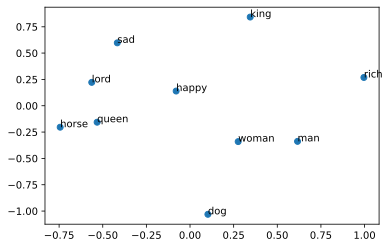

In [98]:
result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

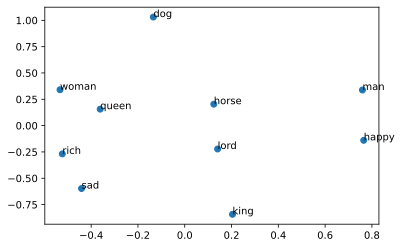

In [99]:
result= compute_pca(X, 4)
pyplot.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 3], result[i, 1]))
pyplot.show()